<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_6_OlivaresIvan_197615435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [3]:
pip install librosa --quiet


In [26]:
import numpy as np
import torch
import librosa

def calcular_kurtosis(data,media):
    n = len(data)
    std_dev = np.std(data)
    kurtosis = sum(((x - media) / std_dev) ** 4 for x in data) / n - 3
    return kurtosis

def calcular_Skewness(data,media):
    n = len(data)
    std_dev = np.std(data)
    skewness = sum(((x - media) / std_dev) ** 4 for x in data) / n
    return skewness

def calcular_zero_crossing_rate(data):
    zero_crossings = 0
    for i in range(1, len(data)):
        if (data[i-1] >= 0 and data[i] < 0) or (data[i-1] < 0 and data[i] >= 0):
            zero_crossings += 1
    # Normalizar el Zero Crossing Rate dividiendo por el número total de muestras menos uno
    zcr = zero_crossings / (len(data) - 1)
    return zcr

def calcular_spectral_centroid(data, sr):
    # Calcular la Transformada de Fourier de la señal de audio
    fft_spectrum = np.abs(np.fft.fft(data))
    # Calcular las frecuencias correspondientes
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sr)
    # Calcular el Spectral Centroid ponderando las frecuencias por las amplitudes
    spectral_centroid = np.sum(frequencies * fft_spectrum) / np.sum(fft_spectrum)
    return spectral_centroid

def calcular_energia(data):
    # Calcular la energía sumando el cuadrado de cada muestra
    energia = np.sum(data ** 2)
    return energia



def calcular_frecuencia_fundamental(data, sr):
    # Calcular la autocorrelación de la señal
    autocorr = np.correlate(data, data, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    # Encontrar el primer máximo después del primer mínimo
    diff = np.diff(autocorr)
    start = np.where(diff > 0)[0][0]
    peak = np.argmax(autocorr[start:]) + start

    # Convertir el índice del pico en frecuencia
    frecuencia_fundamental = float(sr) / peak
    return frecuencia_fundamental

In [27]:
import numpy as np
import torch
import librosa

data,sr = librosa.load("tarea6.wav")

# media
media = np.mean(data)
print("La media de los datos es: ",media)
# kurtosis
k = calcular_kurtosis(data,media)
print("El valor de kurtosis para los datos es: ",k)
#Skewness
data_skew = calcular_Skewness(data,media)
print("El valor de skewness para los datos es: ",data_skew)
# Zero crossing rate
ZCR = calcular_zero_crossing_rate(data)
print("El valor de ZCR para los datos es : ",ZCR)
# spectral centroid
data_SC = calcular_spectral_centroid(data,sr)
print("El valor de spectral centroid es: ",data_SC)
# Energía
energia = calcular_energia(data)
print("La energía de la señal es: ",energia)

#RMSE


# Frecuencia fundamental
freq_fund = calcular_frecuencia_fundamental(data,sr)
print("LA frecuencia fundamental es: ",freq_fund)

La media de los datos es:  2.062024e-05
El valor de kurtosis para los datos es:  0.025830743189412253
El valor de skewness para los datos es:  3.0258307431894123
El valor de ZCR para los datos es :  0.12100566343729038
El valor de spectral centroid es:  -1.2927154816671352e-09
La energía de la señal es:  19655.127
LA frecuencia fundamental es:  98.87892376681614


In [5]:
sr

22050

## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


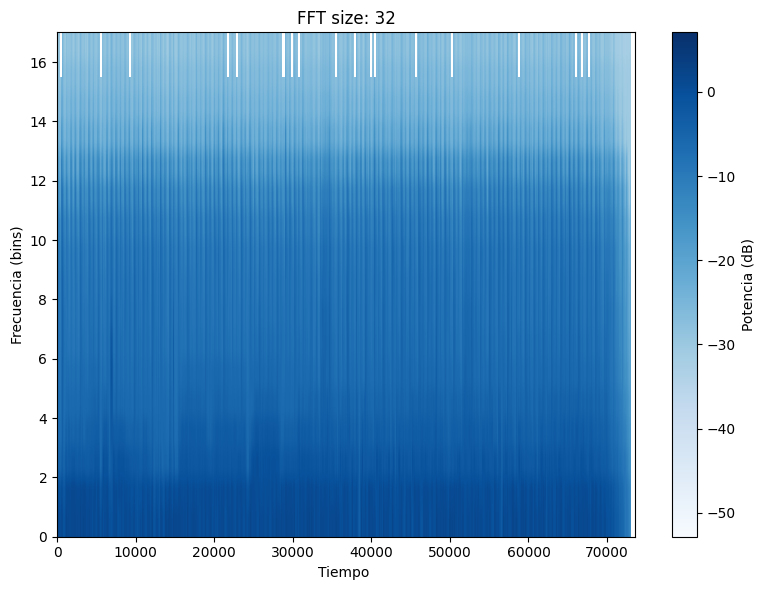

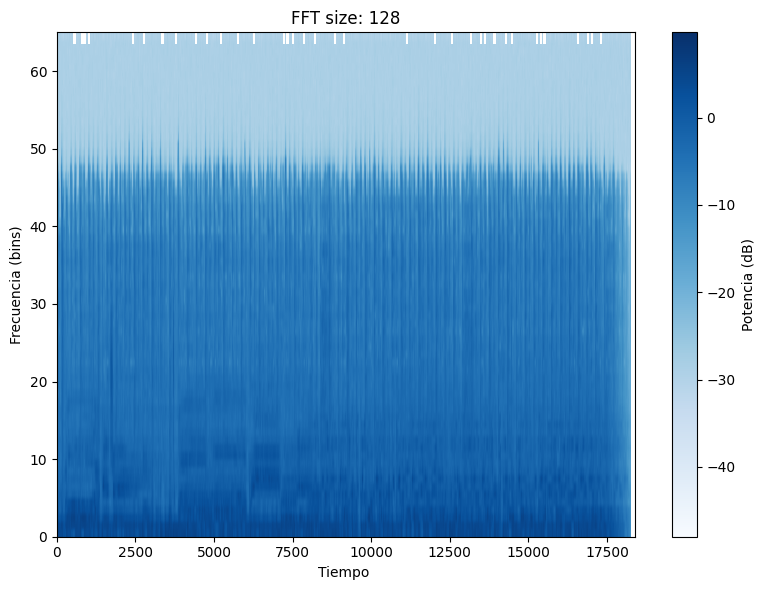

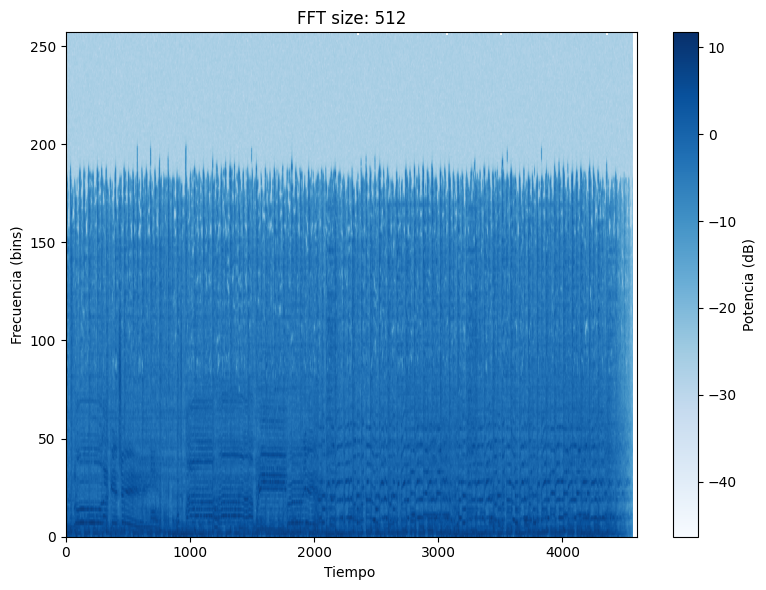

In [9]:
import torch
import torchaudio
import matplotlib.pyplot as plt
# Cargar el archivo de audio
archivo = "tarea6.wav"
y, sr = torchaudio.load(archivo)

# Valores de tamaño de la FFT
fft_tamanno = [32, 128, 512]

# Calcular y visualizar el espectrograma para cada tamaño de FFT
for fft_size in fft_tamanno:
    # Calcular el espectrograma
    espectrograma = torchaudio.transforms.Spectrogram(n_fft=fft_size)(y)

    # Obtener dimensiones
    canales, bins, frames = espectrograma.shape

    # Visualizar el espectrograma
    plt.figure(figsize=(8, 6))
    plt.imshow(espectrograma.log2()[0], cmap='Blues', aspect='auto', origin='lower', extent=[0, frames, 0, bins])
    plt.xlabel('Tiempo ')
    plt.ylabel('Frecuencia (bins)')
    plt.title(f'FFT size: {fft_size}')
    plt.colorbar(label='Potencia (dB)')
    plt.tight_layout()
    plt.show()



### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

In [1]:
!pip install sounddevice --quiet
!pip install pydub --quiet
!pip install ipython --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00


In [6]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd
from pydub import AudioSegment
import numpy as np
import scipy.signal as signal
import librosa



def shift_pitch(audio, sample_rate, semitones):
    # Definir la ventana y el solapamiento
    window = signal.windows.hann(1024)
    overlap_length = len(window) // 2

    # Calcular el análisis hop length
    analysis_hop_length = len(window) - overlap_length

    # Calcular el factor de velocidad de estiramiento
    speedup_factor = 2 ** (-semitones / 12)

    # Calcular el hop length de síntesis
    synthesis_hop_length = int(round((1 / speedup_factor) * analysis_hop_length))

    # Aplicar la modificación de escala de tiempo
    modified_audio = librosa.effects.time_stretch(audio, rate=speedup_factor)

    # Realizar el ajuste de la tasa de muestreo
    resampled_audio = signal.resample_poly(modified_audio, synthesis_hop_length, analysis_hop_length)

    return resampled_audio


# Cargar el archivo de audio
archivo = "tarea6.wav"
audio, sr = torchaudio.load(archivo)

semitones = 2  # Cambio de tono deseado

audio_modificado = shift_pitch(audio, sr, semitones)

# Reproducir audio orginal
m = np.max(np.abs(audio))
sigf32 = (audio/m).astype(np.float32) #normalizar datos

write("raw.wav", sr, sigf32) #saving
ipd.Audio('raw.wav') #playing


# Reproducir audio modificado
m2 = np.max(np.abs(audio_modificado))
sigf32_2 = (audio_modificado/m2).astype(np.float32) #normalizar datos
write("raw_mod.wav", sr, sigf32) #saving
ipd.Audio('raw_mod.wav') #playing



ParameterError: Audio data must be of type numpy.ndarray

In [7]:
type(audio)

torch.Tensor

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
